In [1]:
# Importing necessary libraries
from keras.datasets import fashion_mnist  # Importing Fashion MNIST dataset from Keras
import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting

# **Question-1**

In [2]:
#loading data set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Checking Dataset shape
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# type(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# x_train.shape

def input_matrix(image):
    """
    Reshape and normalize input images.
    
    Parameters:
    - image: Input image
    
    Returns:
    - Reshaped and normalized input matrix
    """
    return image.reshape(image.shape[0], -1) / 255.0

In [4]:
# class labels for fashion mnist dataset
label = {
     0 :  "T-shirt/top",
     1 :  "Trouser",
     2 :  "Pullover",
     3 :  "Dress",
     4 :  "Coat",
     5 :  "Sandal",
     6 :  "Shirt",
     7 :  "Sneaker",
     8 :  "Bag",
     9 :  "Ankle boot"
}

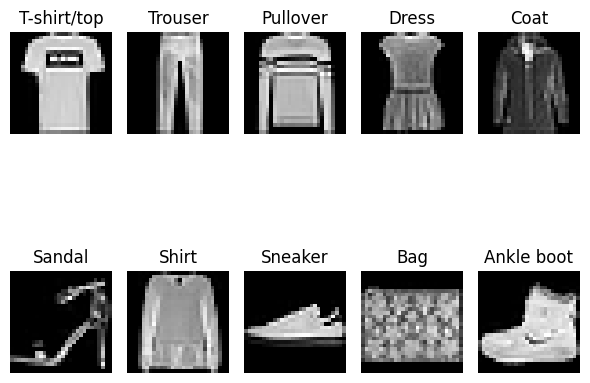

In [5]:
# Creating subplots to display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(6, 6))

# Iterating through each class
for i in range(len(label)):
    row = i // 5  # Calculating row index for subplot
    col = i % 5   # Calculating column index for subplot
    
    # Finding the index of the first image in the training set with label i
    idx = np.argmax(y_train == i)
    
    # Displaying the image corresponding to the label i
    axes[row, col].imshow(x_train[idx], cmap='gray')  # Displaying grayscale image
    axes[row, col].set_title(label[i])  # Setting title with class label
    axes[row, col].axis('off')  # Turning off axis

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

# **Activation Functions**

In [6]:
""" Activation Class :- Contains various diffrent activations functions """
class Activation_Functions:
    def __init__(self) -> None:
        pass


    def sigmoid(self, x):
        # Compute sigmoid element-wise for each element of the matrix
        sigmoid_x = np.zeros_like(x)  # Initialize output matrix with zeros
        
        # Apply the sigmoid function element-wise using vectorized operations
        positive_mask = x >= 0
        sigmoid_x[positive_mask] = 1.0 / (1.0 + np.exp(-x[positive_mask]))
        sigmoid_x[~positive_mask] = np.exp(x[~positive_mask]) / (1.0 + np.exp(x[~positive_mask]))
        
        return sigmoid_x


    def ReLU(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    

    def softmax(self, x):
        # Subtract the maximum value along the axis to prevent overflow
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)
        
        # Compute softmax probabilities
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        
        return softmax_x


    def activation(self, x, fun):
        if fun == "tanh":
            return self.tanh(x)
        elif fun == "sigmoid":
            return self.sigmoid(x)
        elif fun == "ReLU":
            return self.ReLU(x)
        elif fun == "softmax":
            return self.softmax(x)

# **Derivatives**

In [7]:
class Derivatives:
    def __init__(self) -> None:
        """ 
            Constructor method for Derivatives class.
            Initialization of object of Activation_Functions class
        """
        self.fun = Activation_Functions()  # Creating an instance of Activation_Functions class

    
    def sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.sigmoid(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative

    
    def tanh_derivative(self, x):
        """
        Computes the derivative of the hyperbolic tangent (tanh) activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the tanh activation function
        """
        g = self.fun.tanh(x)  # Computing tanh activation
        return 1 + g * g  # Computing and returning derivative

    
    def ReLU_derivative(self, x):
        """
        Computes the derivative of the Rectified Linear Unit (ReLU) activation function.
        
        Parameters:
        - x: Input value
        
        Returns:
        - Derivative of the ReLU activation function
        """
        g = self.fun.ReLU(x)  # Computing ReLU activation
        return np.where(g > 0, 1, 0)  # Computing and returning derivative


    def derivatives(self, x, activation_function):
        """
        Computes the derivative of a specified activation function.
        
        Parameters:
        - x: Input value
        - activation_function: Name of the activation function
        
        Returns:
        - Derivative of the specified activation function
        """
        if activation_function == "sigmoid":
            return self.sigmoid_derivative(x)  # Computing derivative for sigmoid activation
        elif activation_function == "tanh":
            return self.tanh_derivative(x)  # Computing derivative for tanh activation
        elif activation_function == "ReLU":
            return self.ReLU_derivative(x)  # Computing derivative for ReLU activation


# **Loss Functions**

In [8]:
class Loss_Function:
    def __init__(self) -> None:
        """
        Constructor method for Loss_Function class.
        Initializes the default loss function to cross-entropy.
        """
        self.default_loss_function = "cross_entropy"


    def compute_loss(self, y_true, y_hat, loss_function):
        """
        Computes the loss based on the given true labels and predicted probabilities.
        
        Parameters:
        - y_true: True labels (one-hot encoded) 
        - y_hat: Predicted probabilities
        - loss_function: Name of the loss function to be used
        
        Returns:
        - Loss value
        """

        
        if loss_function == None: 
            # If no loss function is specified, use the default loss function
            loss_function = self.default_loss_function

        if loss_function == "cross_entropy":
            # Set a small value epsilon to avoid numerical instability
            epsilon = 1e-15
            # Clip the predicted values to avoid log(0) and log(1) scenarios
            y_hat = np.clip(y_hat, epsilon, 1. - epsilon)
            # Compute the cross-entropy loss for each sample
            loss = -np.sum(y_true * np.log(y_hat), axis=1)
            # Compute the mean loss across all samples
            loss = np.mean(loss)
            # Return the computed loss
            return loss


# **Question - 2**

In [9]:
class Network:
    def __init__(self, PARAM):
        """
        Constructor method for Network class.
        
        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layers, output size)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store activations of each layer
        self.h = {}       # Dictionary to store outputs of each layer
        self.fun = Activation_Functions()  # Instance of Activation_Functions class
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # List containing sizes of all layers
        self.y_predictions = []  # List to store predicted probabilities for each input sample


    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
            self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values


    def forward_pass(self, x, activation_function):
        """
        Method to perform forward pass through the network.
        
        Parameters:
        - x: Input data
        - activation_function: Name of the activation function to be used
        
        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        total_layer = len(self.size_list)
        self.h[0] = x  # Input layer

        for layer in range(1, total_layer-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing preactivation
            self.h[layer] = self.fun.activation(self.a[layer], fun=activation_function)  # Applying activation function
    
        self.a[total_layer-1] = np.dot(self.h[layer], self.weight[total_layer-1]) + self.bias[total_layer-1]  # Computing weighted sum for final layer
        self.h[total_layer-1] = self.fun.activation(self.a[total_layer-1], fun="softmax")  # Applying softmax activation
        
        return self.h[total_layer-1]  # Returning output of final layer


    def predict_probability(self, dataset, activation):
        """
        Method to predict probabilities for each input sample in the dataset.
        
        Parameters:
        - dataset: Input dataset
        - activation: Name of the activation function to be used
        
        Returns:
        - List containing predicted probabilities for each input sample
        """
        self.initialize_parameters()  # Initializing network parameters

        for image in dataset:
            x = image.reshape(1, -1) / 255.0  # Reshaping and normalizing input data
            y_hat = self.forward_pass(x, activation)  # Performing forward pass
            self.y_predictions.append(y_hat)  # Storing predicted probabilities
            
        return self.y_predictions  # Returning list of predicted probabilities



In [10]:
PARAM = {
    "input_size" : 784,            # Size of the input layer (number of input features)
    "hidden_layers" : [5, 6, 7],   # Sizes of hidden layers in the neural network
    "output_size" : 10             # Size of the output layer (number of classes)
}

n1 = Network(PARAM)  # Creating an instance of the Network class with the given parameters
y_pred = n1.predict_probability(x_train, "sigmoid")  # Predicting probabilities for each sample in the training dataset using sigmoid activation function



In [11]:
np.set_printoptions(suppress=True)  # Suppressing scientific notation in printed arrays
print(y_pred[0])  # Printing the predicted probabilities for the first sample

[[0.00348156 0.00380564 0.00512167 0.01079694 0.00228669 0.00014978
  0.00011048 0.96998277 0.0039166  0.00034787]]


# **Question - 3**

# **Optimizers**

In [12]:
class Optimizer:
    def __init__(self, neural_network, PARAM) -> None:
        """
        Constructor method for Optimizer class.
        
        Parameters:
        - neural_network: Instance of the neural network class
        - PARAM: Dictionary containing optimization parameters (eta, weight_decay, optimizer, beta)
        """
        self.neural_network = neural_network  # Neural network object
        self.eta = PARAM["eta"]  # Learning rate
        self.weight_decay = PARAM["weight_decay"]  # Weight decay factor
        self.optimizer = PARAM["optimizer"]  # Optimization algorithm (sgd, mgd, nag)
        self.beta = PARAM["beta"]  # Momentum factor for momentum-based optimization
        self.epsilon = PARAM["epsilon"]
        self.beta2 = PARAM["beta2"]

    def stochastic_gradient_decent(self):
        """
        Method to perform stochastic gradient descent optimization.
        """
        weight_decay = self.weight_decay
        eta = self.eta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.weight[layer] = self.neural_network.weight[layer] - eta * self.neural_network.grad_w[layer]  # Updating weights
            self.neural_network.bias[layer] = self.neural_network.bias[layer] - eta * self.neural_network.grad_b[layer]  # Updating biases
        
    def update(self, t):
        """
        Method to update network parameters based on the selected optimization algorithm.
        """
        if self.optimizer == "sgd":
            self.stochastic_gradient_decent()
        elif self.optimizer == "mgd":
            self.momentum_based_gradient_decent()
        elif self.optimizer == "nag":
            self.nesterov_accelerated_gradient_decent()
        elif self.optimizer == "rmsprop":
            self.rmsprop()
        elif self.optimizer == "adam":
            self.adam(t)
        elif self.optimizer == "nadam":
            self.nadam(t)
             

    def momentum_based_gradient_decent(self):
        """
        Method to perform momentum-based gradient descent optimization.
        """
        weight_decay = self.weight_decay
        beta = self.beta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
                decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
                self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

                uw = beta * self.neural_network.prv_w[layer] + self.eta * self.neural_network.grad_w[layer]  # Computing update for weights
                ub = beta * self.neural_network.prv_b[layer] + self.eta * self.neural_network.grad_b[layer]  # Computing update for biases

                self.neural_network.weight[layer] -= uw  # Updating weights
                self.neural_network.bias[layer] -= ub  # Updating biases

                self.neural_network.prv_w[layer] = uw  # Storing previous weight update
                self.neural_network.prv_b[layer] = ub  # Storing previous bias update


    def nesterov_accelerated_gradient_decent(self):
        """
        Method to perform Nesterov Accelerated Gradient Descent optimization.
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]

            self.neural_network.weight[layer] -= ((self.eta) * (self.beta * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer])) 
            self.neural_network.bias[layer] -= ((self.eta) * (self.beta * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer])) 

    def rmsprop(self):
        """
        Method to perform Root Mean Square Propogation optimization.
        """
        for layer in range(len(self.neural_network.size_list) - 1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * (self.neural_network.grad_b[layer] ** 2)

            self.neural_network.weight[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_w[layer] + self.epsilon))) * self.neural_network.grad_w[layer]
            self.neural_network.bias[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_b[layer] + self.epsilon))) * self.neural_network.grad_b[layer]

    
    def adam(self, t):
        """
        Method to perform adam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * self.neural_network.grad_b[layer]

            
            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * m_w_hat
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * m_b_hat


    def nadam(self, t):
        """
        Method to perform nadam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            
            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * self.neural_network.grad_b[layer]

            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)
            
            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * (self.beta * m_w_hat + ((1 - self.beta) * self.neural_network.grad_w[layer])/(1 - self.beta ** t))
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * (self.beta * m_b_hat + ((1 - self.beta) * self.neural_network.grad_b[layer])/(1 - self.beta ** t))
            

            

    


        


# **Neural Network**

In [13]:
class Neural_Network:
    def __init__(self, PARAM) -> None:
        """
        Constructor method for Neural_Network class.
        
        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layer sizes, output size,
                 activation function, training input, training output)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store preactivation of each layer
        self.h = {}       # Dictionary to store activations of each layer
        self.grad_w = {}  # Dictionary to store gradients of weights for each layer
        self.grad_b = {}  # Dictionary to store gradients of biases for each layer
        self.prv_w = {}   # Dictionary to store previous weights for momentum-based optimization
        self.prv_b = {}   # Dictionary to store previous biases for momentum-based optimization
        self.activation_function = PARAM["activation_function"]  # Activation function for hidden layers
        self.y_true = PARAM["training_output"]  # True labels for training data
        self.input = PARAM["training_input"]     # Input data for training
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # Sizes of all layers
        self.act = Activation_Functions()  # Instance of Activation_Functions class
        self.derivative = Derivatives()     # Instance of Derivatives class
        self.prv2_w = {}
        self.prv2_b = {}

    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
            # self.weight[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing weights with random values
            self.bias[layer] = np.random.rand(1, self.size_list[layer])  # Initializing biases with random values
            # self.bias[layer] = np.zeros((1, self.size_list[layer]))  # Initializing biases with random values
            self.prv_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero
            self.prv2_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv2_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero

    def forward_propagation(self, x):
        """
        Method to perform forward propagation through the network.
        
        Parameters:
        - x: Input data
        
        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        self.h[0] = x  # Input layer
        for layer in range(1, len(self.size_list)-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing weighted sum of inputs
            self.h[layer] = self.act.activation(self.a[layer], self.activation_function)  # Applying activation function
        self.a[layer+1] = np.dot(self.h[layer], self.weight[layer+1]) + self.bias[layer+1]  # Computing weighted sum for final layer
        self.h[layer+1] = self.act.activation(self.a[layer+1], "softmax")  # Applying softmax activation
        return self.h[layer+1]  # Returning output of final layer

    def backward_propagation(self, input, y_true, y_hat):
        """
        Method to perform backward propagation through the network.
        
        Parameters:
        - input: Input data
        - y_true: True labels
        - y_hat: Predicted probabilities
        
        Returns:
        - Gradients of weights and biases
        """
        error_wrt_output = -(y_true - y_hat)  # Computing error with respect to output layer

        for layer in range(len(self.size_list)-1, 1, -1):
            self.grad_w[layer] = np.dot(self.h[layer-1].T, error_wrt_output)  # Computing gradients of weights
            self.grad_b[layer] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases

            error_wrt_hidden = np.dot(error_wrt_output, self.weight[layer].T)  # Computing error with respect to hidden layer
            error_wrt_output = error_wrt_hidden * self.derivative.derivatives(self.a[layer-1], self.activation_function)  # Computing error with respect to output of hidden layer
        self.grad_w[1] = np.dot(input.T, error_wrt_output)  # Computing gradients of weights for input layer
        self.grad_b[1] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases for input layer
        return self.grad_w, self.grad_b  # Returning gradients of weights and biases

    def one_hot_vector(self, y_true):
        """
        Method to convert true labels into one-hot vectors.
        
        Parameters:
        - y_true: True labels
        
        Returns:
        - One-hot vector representation of true labels
        """
        vec = np.zeros(10)  # Initializing one-hot vector
        vec[y_true] = 1  # Setting the corresponding index to 1
        return vec

    def one_hot_matrix(self, y_true):
        """
        Method to convert true labels into one-hot matrices.
        
        Parameters:
        - y_true: True labels
        
        Returns:
        - One-hot matrix representation of true labels
        """
        row = y_true.shape[0]  # Number of samples
        col = 10  # Number of classes
        mat = np.zeros((row, col))  # Initializing one-hot matrix
        for i in range(row):
            mat[i][y_true[i]] = 1  # Setting the corresponding index to 1
        return mat


# Train Model

In [14]:
class Train_Model:
    def __init__(self, neural_network, optimizer) -> None:
        """
        Constructor method for Train_Model class.
        
        Parameters:
        - PARAM_NEURAL_NETWORK: Dictionary containing parameters for the neural network
        - PARAM_OPTIMIZER: Dictionary containing parameters for the optimizer
        """
        self.neural_network =neural_network  # Neural network instance
        self.optimizer = optimizer  # Optimizer instance
        self.loss = Loss_Function()  # Loss function instance

    def compute_performance(self, data, label):
        y_predictions = self.neural_network.forward_propagation(data)
        labels = self.neural_network.one_hot_matrix(label)
        accuracy = np.sum(np.argmax(y_predictions, axis=1) == np.argmax(labels, axis = 1))
        loss = self.loss.compute_loss(labels, y_predictions, "cross_entropy")
        return loss, (accuracy/len(data)) * 100
                
    def fit_data(self, batch_size, epochs):
        """
        Method to train the model on the given dataset.
        
        Parameters:
        - batch_size: Size of each batch
        - epochs: Number of epochs for training
        """
        x_test_ = input_matrix(x_test)
        self.neural_network.initialize_parameters()  # Initializing parameters of the neural network
        total_batches = int(np.ceil(self.neural_network.input.shape[0] / batch_size))  # Total number of batches
        for i in range(epochs):
            loss = 0  # Initializing loss for each epoch
            accuracy = 0  # Initializing accuracy for each epoch
            t = 1
            for batch in range(total_batches):
                batch_start = batch * batch_size  # Starting index of the batch
                batch_end = batch_start + batch_size  # Ending index of the batch
                image_set = self.neural_network.input[batch_start : batch_end]  # Extracting batch of input images
                res_set = self.neural_network.y_true[batch_start : batch_end]  # Extracting batch of true labels
                
                # if self.optimizer.optimizer == "nag":
                #     for layer in range(1, len(self.neural_network.size_list)):
                #         self.neural_network.weight[layer] -= (self.optimizer.beta * self.neural_network.prv_w[layer])
                #         self.neural_network.bias[layer] -= (self.optimizer.beta * self.neural_network.prv_b[layer])
                    
                y_hat = self.neural_network.forward_propagation(image_set)  # Forward propagation
                res = self.neural_network.one_hot_matrix(res_set)  # Converting true labels into one-hot matrices
                grad_w , grad_b = self.neural_network.backward_propagation(image_set, res, y_hat)  # Backward propagation
                    
                for layer in range(1, len(self.neural_network.size_list)):
                    self.neural_network.grad_w[layer] = grad_w[layer]/batch_size  # Normalizing gradients of weights
                    self.neural_network.grad_b[layer] = grad_b[layer]/batch_size  # Normalizing gradients of biases

                self.optimizer.update(t)  # Updating weights and biases using optimizer
                t += 1
                # for img in range(y_hat.shape[0]):
                #     if np.argmax(y_hat[img]) == np.argmax(res[img]):  # Calculating accuracy
                #         accuracy += 1
                # loss += self.loss.compute_loss(res, y_hat, "cross_entropy")  # Calculating loss
            
            t_loss, t_acc = self.compute_performance(self.neural_network.input, self.neural_network.y_true)
            v_loss, v_acc = self.compute_performance(x_test_, y_test)

            print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
            print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch


         

# **Training**

In [17]:

training_input = input_matrix(x_train)

PARAM_NEURAL_NETWORK = {
    "input_size": training_input.shape[1],
    "output_size": len(label),
    "hidden_layers": [32, 64, 128],
    "activation_function": "sigmoid",
    "training_output": y_train,
    "training_input": training_input,
}

PARAM_OPTIMIZER = {
    "eta": 0.005,
    "optimizer": "nadam",
    "beta": 0.9,
    "weight_decay": 0.00001,
    "epsilon": 1e-8,
    "beta2" : 0.999
}

neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer)
my_model.fit_data(batch_size=16, epochs=5)


epoch:1 :: 
 Training-loss : 0.5228505381229007, Training-accuracy:81.56333333333333%
Validation-loss : 0.5622777022628573, Validation-accuracy:80.31%


epoch:2 :: 
 Training-loss : 0.47928071911678316, Training-accuracy:82.98833333333333%
Validation-loss : 0.5359963431376357, Validation-accuracy:81.51%




In [16]:
test_data = input_matrix(x_test)
y_pred1 = my_model.neural_network.forward_propagation(test_data)
# y_pred2 = n2.forward_propogation(test_data, "tanh")
accuracy1 = np.mean(np.argmax(y_pred1, axis = 1) == y_test)
# accuracy2 = np.mean(np.argmax(y_pred2, axis = 1) == y_train)

print(accuracy1)
print(np.unique(np.argmax(y_pred1, axis = 1)))

0.3887
[1 2 3 5 7 8 9]
